# Test the model performace on unseen immages

## Set Up environment

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import sys
import os
script_dir = os.path.abspath("..")  # Go up one level from `train/`
sys.path.append(script_dir)
from model.model import *

## Test on test set

In [3]:
#train and test data directory
test_data_dir = "../dataset/dataset/test"
#test_data_dir = "test_images"

test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((30,155)),transforms.ToTensor()
]))
img, label = test_dataset[0]
print(img.shape,label)
print("Follwing classes are there : ",test_dataset.classes)

torch.Size([3, 30, 155]) 0
Follwing classes are there :  ['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [4]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [5]:
model = ResNetModel(num_classes=100)
model.load_state_dict(torch.load('../train/resnet_model.pth'))
model.eval()

c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\orlan\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

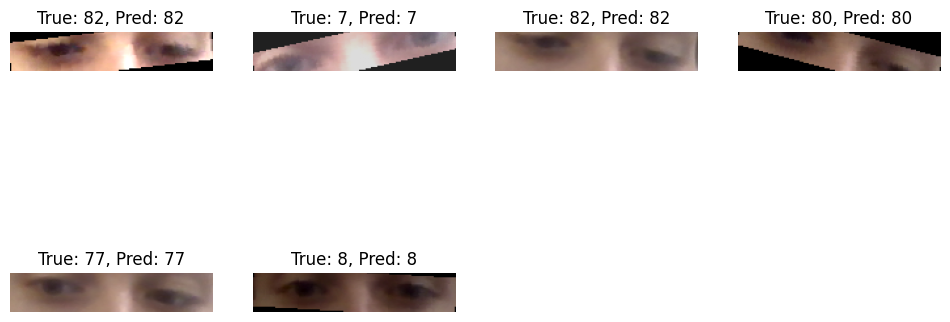

In [7]:
# Function to show images with labels and predictions
def show_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))  # Get a batch of images and labels
    images, labels = images.to(device), labels.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    # Plot images, true labels, and predicted labels
    plt.figure(figsize=(12, 12))
    for i in range(6):  # Show 16 images
        plt.subplot(4, 4, i+1)
        image = images[i].cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
        plt.imshow(image)
        true_label = labels[i].item()
        pred_label = preds[i].item()
        plt.title(f'True: {true_label}, Pred: {pred_label}')
        plt.axis('off')
    plt.show()

# Show predictions on a test batch
show_predictions(model, test_loader)

Very good results

----

## Test on captured live new immages

Using the same technique used to collet data we now collect discrete immages and test the accuracy (collect images with (collect_test_images.py)[https://github.com/GRINGOLOCO7/Eye_Traking/blob/master/test/collect_test_images.py])

test_images/94.png


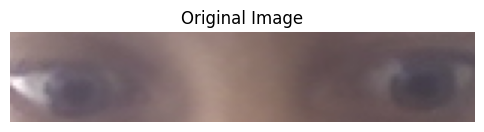

Prediction: Class 37
Predicted class name: 42


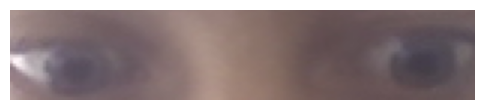

In [18]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

# Define the same transforms you used for your test dataset
transform = transforms.Compose([
    transforms.Resize((30, 155)),
    transforms.ToTensor()
])

# Load the image
image_path = "test_images/94.png"
print(image_path)
image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Apply transformations
transformed_image = transform(image)

# Add batch dimension (models expect batches)
input_tensor = transformed_image.unsqueeze(0)

# Move to the same device as the model
input_tensor = input_tensor.to(device)

# Get prediction
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Convert prediction to class name
predicted_class = predicted.item()
print(f"Prediction: Class {predicted_class}")

# If you have class names mapping
if hasattr(test_dataset, 'classes') and predicted_class < len(test_dataset.classes):
    class_name = test_dataset.classes[predicted_class]
    print(f"Predicted class name: {class_name}")

# Optionally display the transformed image
plt.figure(figsize=(6, 6))
plt.imshow(transformed_image.cpu().permute(1, 2, 0))  # Convert from CxHxW to HxWxC for display
plt.axis('off')
plt.show()